<a href="https://colab.research.google.com/github/ecloguehwang/HSS/blob/master/%EB%AA%A8%ED%8F%89_5%EC%9B%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#colab에서 matplotlib와 sns 라이브러리 그래프 한글을 깨지지 않게 하는 법: 실행 후 런타임 재실행
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
# 라이브러리 부르기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


##  5모 데이터 부르기 : 구글colab에 마운트(mount)하는 방법: 왼쪽 폴더아이콘을 누르기-눈동자 왼쪽 파일마운트 아이콘 클릭- /content/drive/MyDrive/python폴더의 susi_2021simple.csv파일을 불러옴
path = '/content/drive/MyDrive/python/deungchon/'
df = pd.read_csv(f'{path}mo5.csv', encoding = 'cp949')

# 첫 5줄을 봅니다. 
df.head(4)

In [2]:
#matplotlib에서 한글구현
plt.rc('font', family='NanumBarunGothic')

#그래프 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
#이름으로 해당 학생의 전체 석차를 확인: 아름다운 코드
# Get input name
name = input("이름:")

# Filter DataFrame to only include rows with the input name
df_filtered = df[df['이름'] == name]

# Calculate rank of first row in filtered DataFrame
rank = (df[df['백분위평균_4과목_5모'] > df_filtered['백분위평균_4과목_5모'].iloc[0]].groupby('이름')['백분위평균_4과목_5모'].nunique().sum()) + 1

# Print the result
print(f"{name}의 '백분위평균_4과목_5모' 등수는 {rank}등 입니다.")

In [ ]:
df.describe()

In [ ]:
df.isna().sum()

In [23]:
#특정 백분위 구간의 점수별 빈도(ex: 80~85%사이의 빈도수)
mi = int(input("이상:"))
mx = int(input("미만:"))


# mi이상 mx이하 조건을 충족하는 객체 만들기
df_interval = df[(df.백분위평균_4과목_5모 >= mi) & (df.백분위평균_4과목_5모 < mx)]

# value_counts()로 빈도를 세고, sort_index() 기준으로 정렬!
list_1 =  df_interval["백분위평균_4과목_5모"].value_counts().sort_index()
print(list_1)
print("------------------------------")
#print(str(len(list_1))+"명")

#print("{}이상 {}미만 업생:{}명".format(mi, mx, list_1))
print("{}이상 {}미만 {}명".format(mi, mx, len(df_interval)))

#자료 https://stackoverflow.com/questions/43855474/changing-sort-in-value-counts8

이상:89
미만:100
89.30    1
93.23    1
96.95    1
Name: 백분위평균_4과목_5모, dtype: int64
------------------------------
89이상 100미만 3명


In [ ]:
df.info()

In [ ]:
#특정 백분위 구간의 점수별 빈도 조회 후 학생명단과 점수를 엑셀로 저장
mi = int(input("이상:"))
mx = int(input("미만:"))


# mi이상 mx이하 조건을 충족하는 객체 만들기
df_interval = df[(df.백분위평균_4과목_5모 >= mi) & (df.백분위평균_4과목_5모 < mx)]

# value_counts()로 빈도를 세고, sort_index() 기준으로 정렬!
#list_1 =  df_interval["백분위평균_4과목_5모"].value_counts().sort_index()
df_interval_sorted = df_interval.sort_values(by="백분위평균_4과목_5모", ascending = False)


#필요한 변수(열)의 값을 보여줌
print(df_interval_sorted.loc[:, ['반', '번호', '이름', '백분위평균_4과목_5모', '백분위_국어', '백분위_수학', '백분위_탐구1', '백분위_탐구2', '등급_영어', '원점수_영어']])


print("------------------------------")
#print(str(len(list_1))+"명")

#print("{}이상 {}미만 업생:{}명".format(mi, mx, list_1))
print("{}이상 {}미만 {}명".format(mi, mx, len(df_interval_sorted)))


# Save the dataframe to an Excel file
path = '/content/drive/MyDrive/python/deungchon/result_d/'
df_interval_sorted.to_excel(f'{path}삼월모의고사_{mi}%이상.xlsx')

In [ ]:
# 특정학생의 백분위평균을 코드로 계산하는 법
name = input("이름:")
df_kyh = df[df.이름 == name]
average = (df_kyh['백분위_국어'] + df_kyh['백분위_수학'] + (df_kyh['백분위_탐구1'] + df_kyh['백분위_탐구2']) / 2) / 3
print("수능 국어, 수학, 탐구과목의 백분위평균은 {:.1f}%".format(float(average)))

#설명: Here, we have converted the average variable to a float using the float() method and then used the str.format() method to format it as a string with no decimal places using the :.0f format specifier. 
#The resulting string is then used in the print() statement with the "{}%" placeholder for the formatted string.



In [ ]:
#변수(열)별 결측값 갯수 확인
np.sum(pd.isnull(df))

In [ ]:
#이름으로 표준점수와 백분위 조회
name = input("이름:")
df_name = df[(df.이름 == name)]
df_name = df_name[['반', '번호',  '이름', '원점수총점_국어', '원점수총점_수학',  '원점수_영어', '등급_영어', '원점수_탐구1', '원점수_탐구2' ]]
df_name

In [ ]:
#이름으로 표준점수와 백분위 조회
name = input("이름:")
df_name = df[(df.이름 == name)]
df_name = df_name[['반', '번호', '이름',  '백분위_국어', '백분위_수학', '등급_영어', '백분위_탐구1', '백분위_탐구2', '백분위평균_4과목_5모', '표점합']]
df_name

In [ ]:
df.columns

In [ ]:
df_wang = df[df['이름'].str.contains('황')]
df_wang

In [ ]:
df.columns

In [ ]:
#이름으로 등급 조회
name = input("이름:")
df_name = df[(df.이름 == name)]
df_name = df_name[['반', '번호', '이름', '등급_국어', '등급_수학', '등급_영어', '선택_탐구1', '등급_탐구1', '선택_탐구2', '등급_탐구2']]
df_name

In [ ]:
#이름으로 등급 조회
name = input("이름:")
df_name = df[(df.이름 == name)]
df_name = df_name[['반', '번호', '이름', '등급_국어', '등급_수학', '등급_영어', '선택_탐구1', '원점수_탐구1', '등급_탐구1', '선택_탐구2', '원점수_탐구2','등급_탐구2']]
df_name

In [ ]:
#재학생과 졸업생의 평균백분위 정렬
df.sort_values('백분위평균_4과목_5모')

In [44]:
# 백분위평균_4과목_5모를 9개 급간으로 나눔
df_drop = df['백분위평균_4과목_5모'].dropna()
hist, edges = np.histogram(df_drop, 9)
print(hist, edges)

[ 6 11 12 19 14 10 14 14  5] [ 0.67       11.36777778 22.06555556 32.76333333 43.46111111 54.15888889
 64.85666667 75.55444444 86.25222222 96.95      ]


In [ ]:
#급간과 히스트로그램값 확인
print(edges , hist)

[ 9.3        18.92222222 28.54444444 38.16666667 47.78888889 57.41111111
 67.03333333 76.65555556 86.27777778 95.9       ] [13 16 15 13 16 14 12 10  7]


In [ ]:
#급간과 히스트로그램값 확인
print(str(edges)+"점수구간" , str(hist)+"구간별 인원(명)")

[ 9.3        18.92222222 28.54444444 38.16666667 47.78888889 57.41111111
 67.03333333 76.65555556 86.27777778 95.9       ]점수구간 [13 16 15 13 16 14 12 10  7]구간별 인원(명)


Text(0.5, 1.0, '5월 D고 모의고사 백분위평균 구간별 점수')

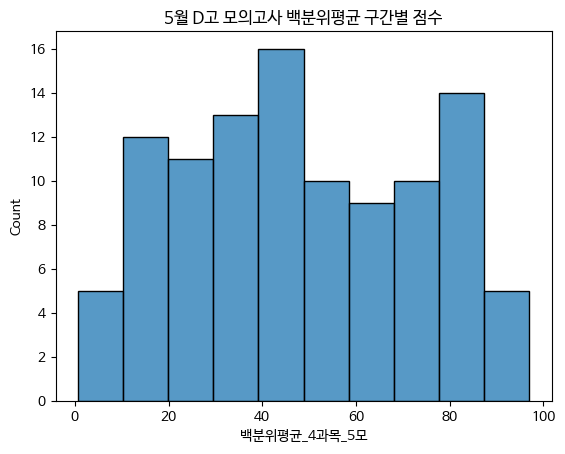

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 
sns.histplot(df.백분위평균_4과목_5모, bins=10, kde=False)
plt.title("5월 D고 모의고사 백분위평균 구간별 점수")

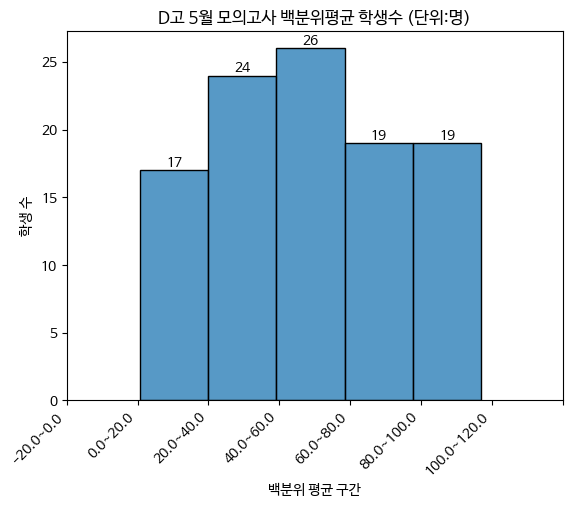

In [28]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

# create the histogram plot
ax = sns.histplot(df.백분위평균_4과목_5모, bins=5, kde=False)
bin_edges = ax.get_xticks()

# add count values to each bar
for rect in ax.patches:
    x = rect.get_x() + rect.get_width() / 2
    y = rect.get_height()
    ax.text(x, y, f'{int(y)}', ha='center', va='bottom')

# set the plot title and axis labels
plt.title("D고 5월 모의고사 백분위평균 학생수 (단위:명)")
plt.xlabel('백분위 평균 구간')
plt.ylabel('학생 수')

# set the X axis tick labels to the bin edges
ax.set_xticks(bin_edges)
labels = ['{:.1f}~{:.1f}'.format(bin_edges[i], bin_edges[i+1]) for i in range(len(bin_edges)-1)] + ['']
#ax.set_xticklabels(labels)
ax.set_xticklabels(labels, rotation=45, ha='right')


# display the plot
plt.show()


In [ ]:
type(df_interval)

pandas.core.frame.DataFrame

In [ ]:
#석차(멏등이내)를 넣고 해당 학생들을 출력하는 것 
try:
    mi = int(input("전체 몇등 이내:"))
except ValueError:
    print("잘못된 입력입니다. 정수값을 입력하세요.")
    # handle the error and exit the program or ask for valid input again

# Drop rows with NaN values in '백분위평균_4과목_5모'
df_interval_clean = df.dropna(subset=['백분위평균_4과목_5모'])

# Sort by '백분위평균_4과목_5모'
df_interval_sorted = df_interval_clean.sort_values(by="백분위평균_4과목_5모", ascending = False)

# Add a new column '백분위석차'
df_interval_sorted['백분위석차'] = df_interval_sorted['백분위평균_4과목_5모'].rank(ascending=False)

# Filter by rank
df_filtered = df_interval_sorted[df_interval_sorted['백분위석차'] <= mi]

# Show the result
print(df_filtered.loc[:, ['반', '이름', '백분위평균_4과목_5모', '백분위_국어_5모', '백분위_수학_5모',  '등급_영어_5모', '백분위_탐구1_5모', '백분위_탐구2_5모',]].reset_index(drop=True))
#print(df_filtered.loc[:, ['반', '이름',   '등급_영어', '원점수_영어']].reset_index(drop=True))

In [43]:
#사탐과 과탐 선택자수 - 한과목이라도 미응시한 학생 제외
df_tamgu_count = df['탐구선택_5모'].value_counts()
print(df_tamgu_count)

사탐    53
과탐    52
Name: 탐구선택_5모, dtype: int64


In [ ]:
#탐구영역 선택자 비율

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


##  데이터 부르기 : 구글colab에 마운트(mount)하는 방법: 왼쪽 폴더아이콘을 누르기-눈동자 왼쪽 파일마운트 아이콘 클릭- /content/drive/MyDrive/python폴더의 susi_2021simple.csv파일을 불러옴
path = '/content/drive/MyDrive/python/deungchon/'
df = pd.read_csv(f'{path}mo3.csv', encoding = 'cp949')


# Calculate the percentage of each variable in the '탐구영역' column
df_tamgu_count = df['탐구영역'].value_counts()
df_tamgu_pct = df_tamgu_count / df_tamgu_count.sum() * 100

# Define colors for each variable
colors = ['#4CAF50', '#F44336', '#2196F3', '#FFEB3B']

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 6))

# Create a list of unique identifier values based on the length of the df_tamgu_pct list
ids = list(range(len(df_tamgu_pct)))

# Create a half doughnut plot with unique identifier values for each wedge
wedges, labels, _ = ax.pie(df_tamgu_pct, colors=colors, wedgeprops={'width': 0.4, 'edgecolor': 'white', 'linewidth': 1}, autopct='%1.0f%%', startangle=90, counterclock=False, labels=df_tamgu_pct.index, textprops={'fontsize': 14})

# Add text labels with percentage values
for w, l, i in zip(wedges, labels, ids):
    ang = (w.theta2 - w.theta1) / 2. + w.theta1
    x, y = np.cos(np.deg2rad(ang)), np.sin(np.deg2rad(ang))
    x *= 1.5
    ax.annotate(f'{l.get_text()} ({df_tamgu_pct[i]:.1f}%)', xy=(x, y), va='center', ha='center', fontsize=12, color='white', rotation=ang, rotation_mode='anchor', gid=i)

# Add a title and legend
ax.set_title(' D고 5월 모평 탐구영역 선택비율', fontsize=20)
ax.legend(title='탐구영역', loc='center right', bbox_to_anchor=(1, 0, 0.5, 1))

# Show the plot
plt.show()


In [ ]:
# 인문계와 자연계 백분위평균 비교
import pandas as pd
import matplotlib.pyplot as plt

## 데이터 부르기 : 구글colab에 마운트(mount)하는 방법: 왼쪽 폴더아이콘을 누르기-눈동자 왼쪽 파일마운트 아이콘 클릭- /content/drive/MyDrive/python폴더의 susi_2021simple.csv파일을 불러옴
path = '/content/drive/MyDrive/python/deungchon/'
df = pd.read_csv(f'{path}mo5.csv', encoding='cp949')

# Group data by '탐구영역' and calculate the mean of '백분위평균_4과목_5모'
df_mean = df.groupby('탐구선택_5모')['백분위평균_4과목_5모'].mean()

# Set bar plot colors
colors = ['gray', 'gray']

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 6))

# Create a vertical bar plot
ax.bar(df_mean.index, df_mean, color=colors, edgecolor='white', width=0.5)

# Add value labels on each bar plot
for i, v in enumerate(df_mean):
    ax.text(i, v+0.5, f'{v:.1f}', ha='center', fontsize=15, color='black')

# Add a title and axis labels
ax.set_title('D고 5월 모평 탐구영역별 백분위 평균 (단위:%)', fontsize=22)
ax.set_ylabel('')

# Enlarge x-axis tick labels
ax.tick_params(axis='x', labelsize=15)

# Remove y-axis ticks and label
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Show the plot
plt.show()


In [ ]:
#19(18)번째 열의 행값들을 출력
col_name = df.columns[19]
print(df.loc[:, col_name])

In [ ]:
#특정 백분위 구간의 영어점수별 빈도 조회 후 학생명단과 점수를 엑셀로 저장
mi = int(input("이상:"))
mx = int(input("미만:"))


# mi이상 mx이하 조건을 충족하는 객체 만들기
df_interval = df[(df.원점수_영어_5모 >= mi) & (df.원점수_영어_5모 < mx)]

# value_counts()로 빈도를 세고, sort_index() 기준으로 정렬!
#list_1 =  df_interval[""].value_counts().sort_index()
df_interval_sorted = df_interval.sort_values(by="원점수_영어_5모", ascending = False)


#필요한 변수(열)의 값을 보여줌
print(df_interval_sorted.loc[:, ['반', '번호', '이름', '등급_영어_5모', '원점수_영어_5모']])


print("------------------------------")
#print(str(len(list_1))+"명")

#print("{}이상 {}미만 업생:{}명".format(mi, mx, list_1))
print("{}이상 {}미만 {}명".format(mi, mx, len(df_interval_sorted)))


# Save the dataframe to an Excel file
path = '/content/drive/MyDrive/python/deungchon/result_d/'
df_interval_sorted.to_excel(f'{path}영어 원점수{mi}%이상_5모.xlsx')

In [ ]:
#특정 백분위 구간의 점수별 빈도 조회 후 학생명단과 점수를 엑셀로 저장
mi = int(input("반:"))
mx = int(input("번호:"))

# mi이상 mx이하 조건을 충족하는 객체 만들기
df_interval = df[(df.반 == mi) & (df.번호 == mx)]


#필요한 변수(열)의 값을 보여줌
print(df_interval.loc[:, ['반', '번호', '이름', '등급_영어', '원점수_영어', '표준점수_국어', '표준점수_수학']])